<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/4_effect_of_training_epochs/1)%20Understand%20the%20effect%20of%20number%20of%20epochs%20in%20transfer%20learning%20-%20mxnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Understand the role of number of epochs in transfer learning


### Till what point increasing epochs helps in imporving acuracy


### How overtraining can result in overfitting the data


### You will be using skin-cancer mnist to train the classifiers

# Table of Contents


## [Install](#0)


## [Train a resnet18 network for 5 epochs](#1)


## [Re-Train a new experiment for 10 epochs](#2)


## [Re-Train a third experiment for 20 epochs](#3)


## [Compare the experiments](#4)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset Details
    - Credits: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
    
    - Seven classes
        - benign_keratosis_like_lesions
        - melanocytic_nevi
        - dermatofibroma
        - melanoma
        - vascular_lesions
        - basal_cell_carcinoma
        - Bowens_disease

### Download the dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ" -O skin_cancer_mnist_dataset.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq skin_cancer_mnist_dataset.zip

# Imports

In [1]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

<a id='1'></a>
# Train a resnet18 network for 5 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-5");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Epochs-5
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-5/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Freeze_Base_Network
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [5]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18_v2", 
            freeze_base_network=True,
            
            
            
            num_epochs=5);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v2
        

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From summary above

    Training params
        Num Epochs: 5

## Train the classifier

In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.640, Train-loss: 1.136 | Val-acc: 0.691514, Val-loss: 1.099, | time: 37.1 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.662, Train-loss: 1.010 | Val-acc: 0.631614, Val-loss: 1.010, | time: 37.3 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.673, Train-loss: 0.987 | Val-acc: 0.706489, Val-loss: 0.915, | time: 40.5 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.679, Train-loss: 0.950 | Val-acc: 0.685191, Val-loss: 0.877, | time: 37.4 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.673, Train-loss: 0.963 | Val-acc: 0.637271, Val-loss: 1.062, | time: 39.3 sec

    Training completed in: 3m 10s
    Best val Acc:          0.706489

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-5/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-5/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Traini

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.963

### Final validation loss - 1.062

(You may get a different result)

<a id='2'></a>
#  Re-Train a new experiment for 10 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-10");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Epochs-10
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-10/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Epochs-5 (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-10 (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [8]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18_v2", 
            freeze_base_network=True,
            
            
            
            num_epochs=10);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v2
        

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From summary above

    Training params
        Num Epochs: 10

## Train the classifier

In [8]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.641, Train-loss: 1.120 | Val-acc: 0.681531, Val-loss: 0.938, | time: 37.4 sec

    Epoch 2/10
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.663, Train-loss: 1.009 | Val-acc: 0.642596, Val-loss: 0.969, | time: 37.4 sec

    Epoch 3/10
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.667, Train-loss: 0.999 | Val-acc: 0.696173, Val-loss: 0.870, | time: 37.8 sec

    Epoch 4/10
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.668, Train-loss: 0.985 | Val-acc: 0.692180, Val-loss: 1.054, | time: 37.6 sec

    Epoch 5/10
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.682, Train-loss: 0.953 | Val-acc: 0.679201, Val-loss: 0.927, | time: 38.8 sec

    Epoch 6/10
    ----------




    curr_lr - 0.009039207967999998
    [Epoch 6] Train-acc: 0.680, Train-loss: 0.937 | Val-acc: 0.683195, Val-loss: 0.915, | time: 38.9 sec

    Epoch 7/10
    ----------




    curr_lr - 0.008858423808639998
    [Epoch 7] Train-acc: 0.685, Train-loss: 0.929 | Val-acc: 0.705824, Val-loss: 0.936, | time: 37.5 sec

    Epoch 8/10
    ----------




    curr_lr - 0.008681255332467197
    [Epoch 8] Train-acc: 0.685, Train-loss: 0.936 | Val-acc: 0.704160, Val-loss: 0.922, | time: 34.6 sec

    Epoch 9/10
    ----------




    curr_lr - 0.008507630225817853
    [Epoch 9] Train-acc: 0.683, Train-loss: 0.922 | Val-acc: 0.677537, Val-loss: 0.901, | time: 36.7 sec

    Epoch 10/10
    ----------




    curr_lr - 0.008337477621301496
    [Epoch 10] Train-acc: 0.683, Train-loss: 0.911 | Val-acc: 0.635275, Val-loss: 1.017, | time: 37.0 sec

    Training completed in: 6m 8s
    Best val Acc:          0.705824

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-10/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-10/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Trai

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.911

### Final validation loss - 1.017

(You may get a different result)

<a id='3'></a>
#  Re-Train a third experiment for 20 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-20");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Epochs-20
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-20/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Epochs-5 (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-10 (Previously Created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-20 (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [10]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18_v2", 
            freeze_base_network=True,
            
            
            
            num_epochs=20);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v2
        

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From summary above

    Training params
        Num Epochs: 20

## Train the classifier

In [11]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/20
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.651, Train-loss: 1.085 | Val-acc: 0.685524, Val-loss: 0.925, | time: 39.0 sec

    Epoch 2/20
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.667, Train-loss: 1.004 | Val-acc: 0.693178, Val-loss: 0.893, | time: 34.6 sec

    Epoch 3/20
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.667, Train-loss: 0.991 | Val-acc: 0.656572, Val-loss: 0.899, | time: 39.4 sec

    Epoch 4/20
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.674, Train-loss: 0.978 | Val-acc: 0.674210, Val-loss: 0.918, | time: 37.4 sec

    Epoch 5/20
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.677, Train-loss: 0.970 | Val-acc: 0.533777, Val-loss: 1.209, | time: 34.7 sec

    Epoch 6/20
    ----------




    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.676, Train-loss: 0.958 | Val-acc: 0.685857, Val-loss: 1.008, | time: 34.7 sec

    Epoch 7/20
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.720, Train-loss: 0.804 | Val-acc: 0.705158, Val-loss: 0.839, | time: 34.7 sec

    Epoch 8/20
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.725, Train-loss: 0.785 | Val-acc: 0.698835, Val-loss: 0.875, | time: 36.2 sec

    Epoch 9/20
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.725, Train-loss: 0.769 | Val-acc: 0.698502, Val-loss: 0.835, | time: 36.7 sec

    Epoch 10/20
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.724, Train-loss: 0.780 | Val-acc: 0.707155, Val-loss: 0.816, | time: 37.3 sec

    Epoch 11/20
    ----------




    curr_lr - 0.001
    [Epoch 11] Train-acc: 0.722, Train-loss: 0.789 | Val-acc: 0.706489, Val-loss: 0.824, | time: 37.7 sec

    Epoch 12/20
    ----------




    curr_lr - 0.001
    [Epoch 12] Train-acc: 0.727, Train-loss: 0.775 | Val-acc: 0.708153, Val-loss: 0.835, | time: 37.7 sec

    Epoch 13/20
    ----------




    curr_lr - 0.0001
    [Epoch 13] Train-acc: 0.725, Train-loss: 0.763 | Val-acc: 0.708819, Val-loss: 0.812, | time: 38.2 sec

    Epoch 14/20
    ----------




    curr_lr - 0.0001
    [Epoch 14] Train-acc: 0.726, Train-loss: 0.761 | Val-acc: 0.710815, Val-loss: 0.829, | time: 39.5 sec

    Epoch 15/20
    ----------




    curr_lr - 0.0001
    [Epoch 15] Train-acc: 0.731, Train-loss: 0.748 | Val-acc: 0.699501, Val-loss: 0.837, | time: 36.2 sec

    Epoch 16/20
    ----------




    curr_lr - 0.0001
    [Epoch 16] Train-acc: 0.729, Train-loss: 0.767 | Val-acc: 0.707488, Val-loss: 0.810, | time: 36.6 sec

    Epoch 17/20
    ----------




    curr_lr - 0.0001
    [Epoch 17] Train-acc: 0.735, Train-loss: 0.749 | Val-acc: 0.709151, Val-loss: 0.831, | time: 38.8 sec

    Epoch 18/20
    ----------




    curr_lr - 0.0001
    [Epoch 18] Train-acc: 0.721, Train-loss: 0.781 | Val-acc: 0.717138, Val-loss: 0.815, | time: 38.7 sec

    Epoch 19/20
    ----------




    curr_lr - 1e-05
    [Epoch 19] Train-acc: 0.729, Train-loss: 0.756 | Val-acc: 0.707155, Val-loss: 0.819, | time: 36.7 sec

    Epoch 20/20
    ----------




    curr_lr - 1e-05
    [Epoch 20] Train-acc: 0.731, Train-loss: 0.750 | Val-acc: 0.720799, Val-loss: 0.829, | time: 38.9 sec

    Training completed in: 12m 14s
    Best val Acc:          0.720799

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-20/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/workspace/Project/Epochs-20/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:  

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.750

### Final validation loss - 0.829

(You may get a different result)

<a id='4'></a>
# Compare the experiments

In [12]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [13]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-num-epochs");

Comparison: - Compare-effect-of-num-epochs


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-num-epochs
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [14]:
gtf.Add_Experiment("Project", "Epochs-5");
gtf.Add_Experiment("Project", "Epochs-10");
gtf.Add_Experiment("Project", "Epochs-20");

Project - Project, Experiment - Epochs-5 added
Project - Project, Experiment - Epochs-10 added
Project - Project, Experiment - Epochs-20 added


### Run Analysis

In [15]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

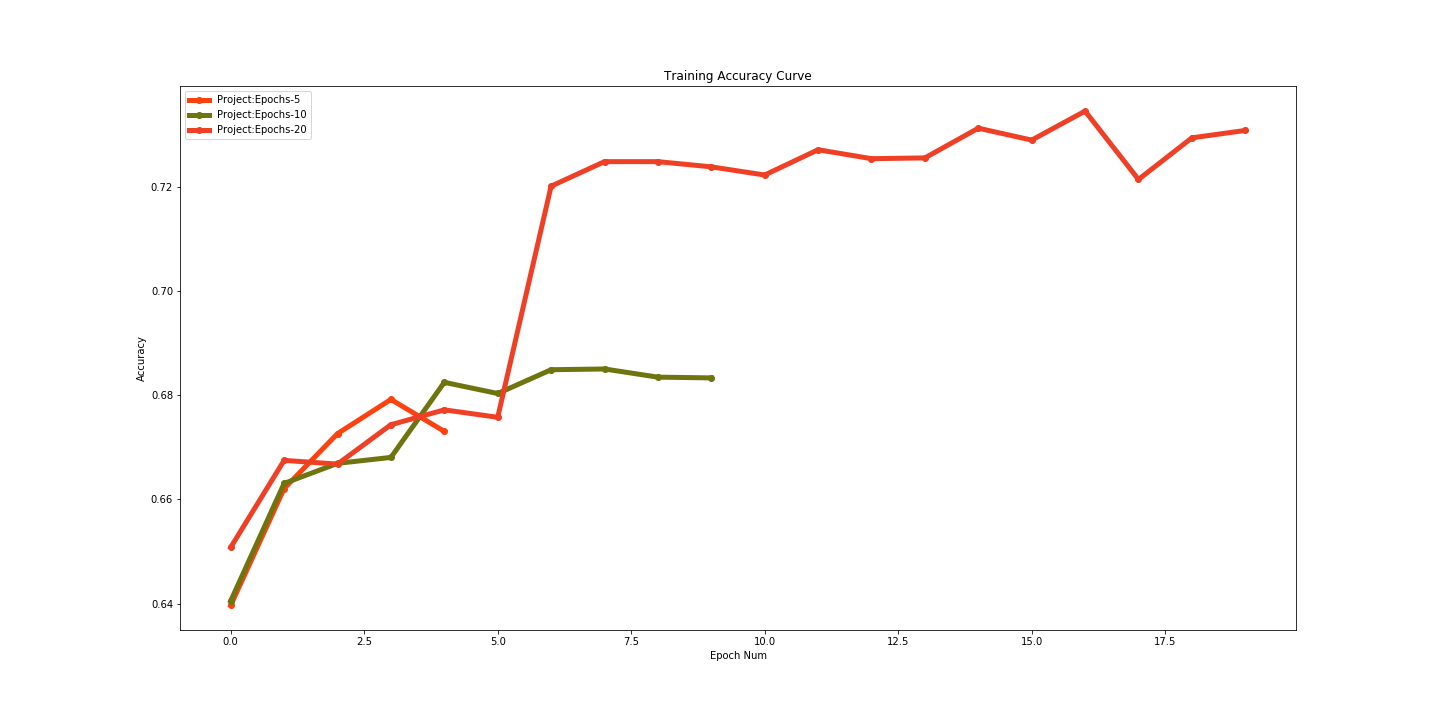

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/train_accuracy.png") 

### Training Loss Curves

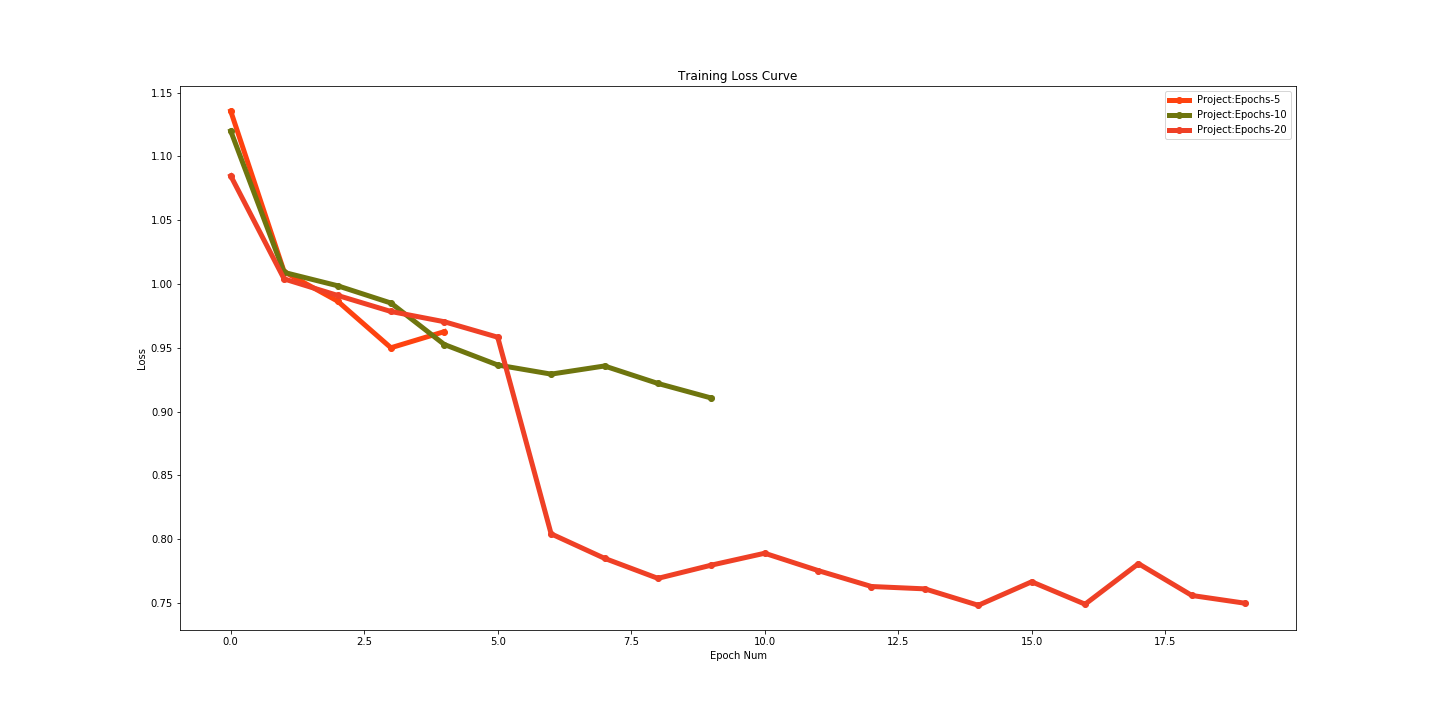

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/train_loss.png") 

### Validation Accuracy Curves

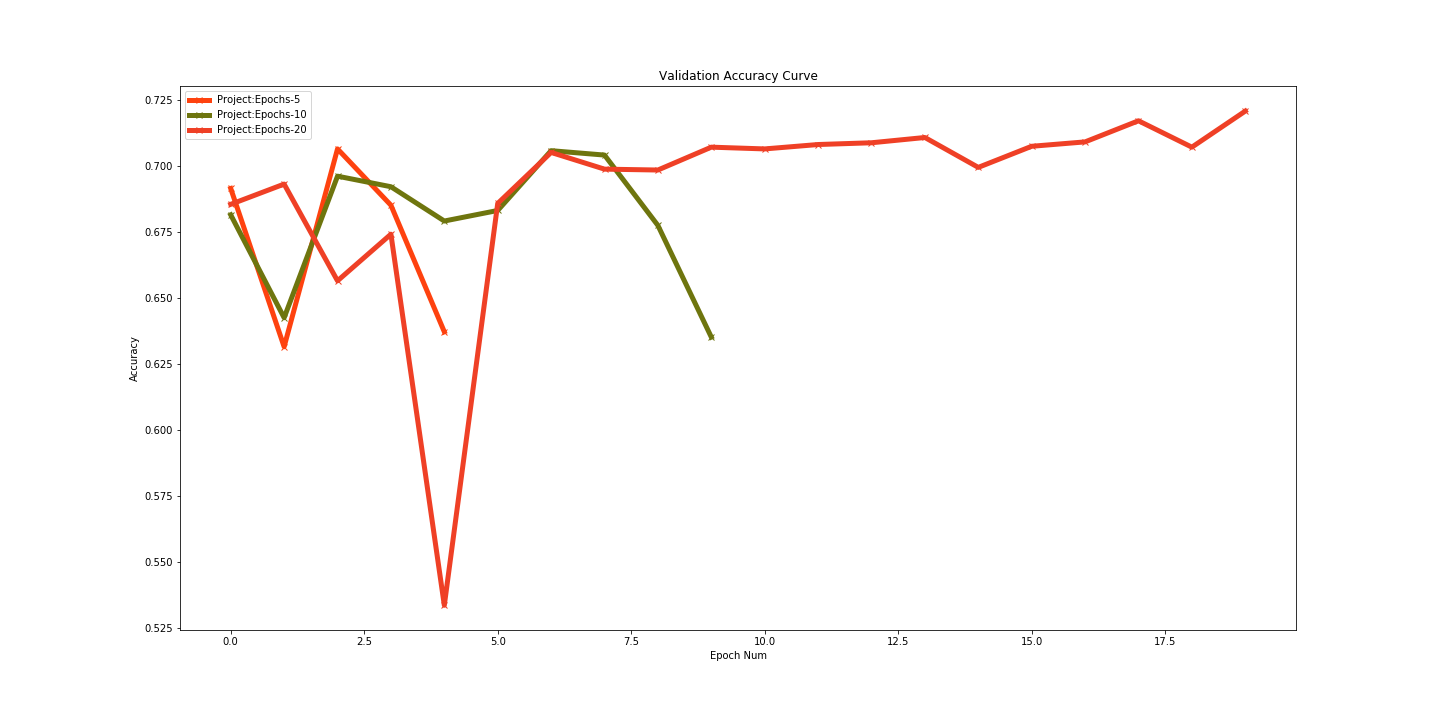

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/val_accuracy.png") 

### Validation loss curves

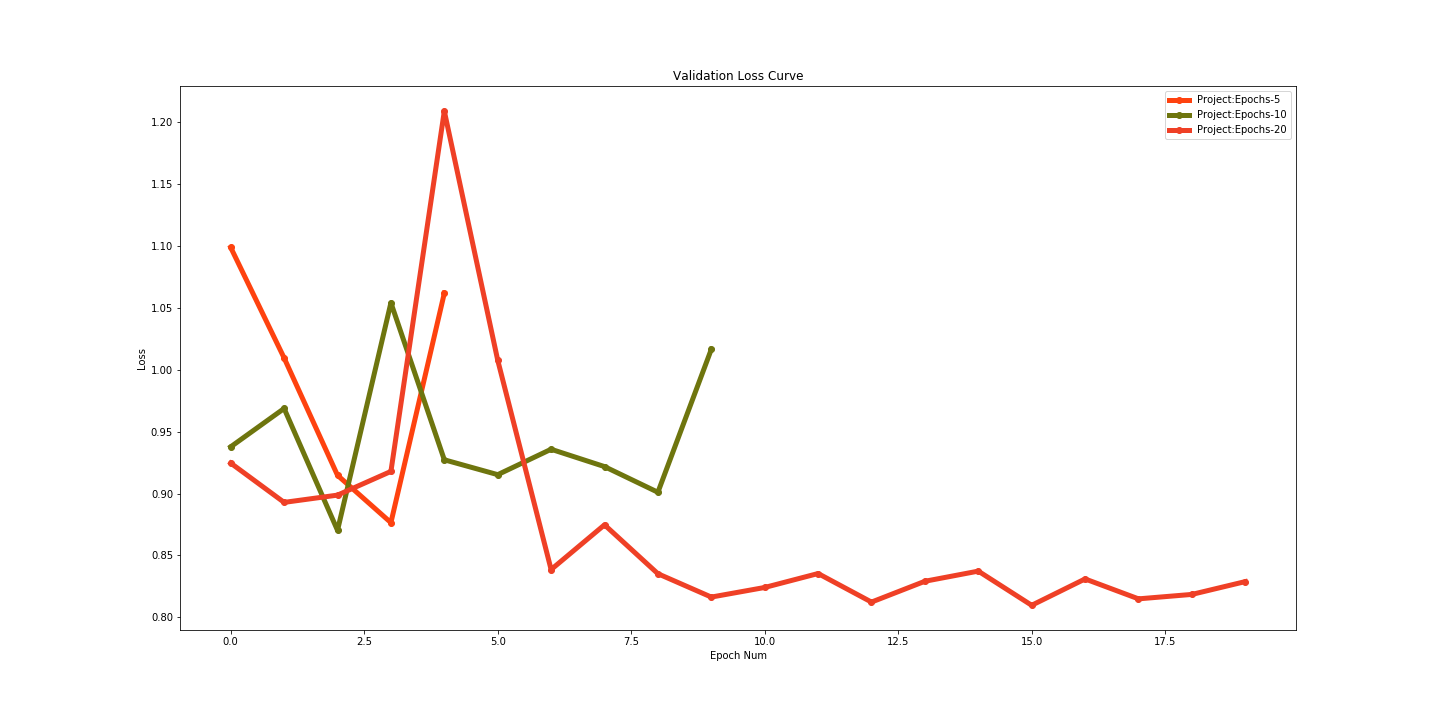

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/val_loss.png") 

# Summary

## Training Accuracies achieved 

### With 5 epochs - 67.3%
### With 10 epochs - 68.3%
### With 20 epochs - 73.1%


## Validation accuracies achieved 

### With 5 epochs - 63.7%
### With 10 epochs - 63.5%
### With 20 epochs - 72.0%

#### Thing to note - After 15 epochs, accuracies and losses tend to saturate

(You may get a different result)